In [15]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from pandas import get_dummies
from numpy import array

In [16]:
df = pd.read_csv("C:/Users/edenl/Desktop/ia_coding/machine_learning/co2/data.csv")

In [17]:
df

,ZipCode,YearsENERGYSTARCertified,YearBuilt,TotalGHGEmissions,ThirdLargestPropertyUseTypeGFA,TaxParcelIdentificationNumber,SteamUse(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),...,NumberofBuildings,NaturalGas(therms),NaturalGas(kBtu),DataYear,CouncilDistrictCode,Electricity(kBtu),Electricity(kWh),ENERGYSTARScore,GHGEmissionsIntensity,LargestPropertyUseTypeGFA
0,5.0,NaN,9775,NaN,NaN,2.312455e+10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10080,5,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,1992,NaN,NaN,7.625703e+09,NaN,NaN,NaN,19.200001,...,NaN,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,1963,NaN,NaN,5.226300e+09,NaN,NaN,NaN,27.100000,...,NaN,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,2015,NaN,NaN,3.303700e+09,NaN,NaN,NaN,30.100000,...,1.0,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,1969,NaN,NaN,9.272201e+09,NaN,NaN,NaN,34.500000,...,NaN,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,1.0,NaN,2010,99.39,NaN,3.834001e+09,0.0000,81.69999695,80.699997,33.799999,...,1.0,15169.839840,1516984.0,2016,1,2700639.0,791512,100.0,0.6,124773.0
3363,1.0,NaN,1924,99.42,NaN,6.003501e+09,0.0000,112.4000015,104.199997,64.300003,...,1.0,17841.310550,1784131.0,2016,1,669202.0,196131.9063,NaN,2.61,34750.0
3364,1.0,NaN,1922,99.44,NaN,6.960001e+08,0.0000,97.5,90.500000,64.500000,...,1.0,18233.908200,1823391.0,2016,1,372437.0,109155,86.0,2.92,34060.0
3365,1.0,NaN,1907,99.59,NaN,5.247801e+09,347207.9063,69.69999695,67.900002,27.000000,...,1.0,9748.979492,974898.0,2016,1,3014081.0,883376.6875,98.0,0.62,160580.0


In [18]:
df.isnull().values.any()

True

In [19]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
3362    False
3363    False
3364    False
3365    False
3366    False
Length: 3367, dtype: bool>

ZipCode                              AxesSubplot(0.125,0.842624;0.0383663x0.0373762)
YearsENERGYSTARCertified           AxesSubplot(0.17104,0.842624;0.0383663x0.0373762)
YearBuilt                          AxesSubplot(0.217079,0.842624;0.0383663x0.0373...
ThirdLargestPropertyUseTypeGFA     AxesSubplot(0.263119,0.842624;0.0383663x0.0373...
TaxParcelIdentificationNumber      AxesSubplot(0.309158,0.842624;0.0383663x0.0373...
SteamUse(kBtu)                     AxesSubplot(0.355198,0.842624;0.0383663x0.0373...
SourceEUI(kBtu/sf)                 AxesSubplot(0.401238,0.842624;0.0383663x0.0373...
SiteEUI(kBtu/sf)                   AxesSubplot(0.447277,0.842624;0.0383663x0.0373...
SiteEnergyUseWN(kBtu)              AxesSubplot(0.493317,0.842624;0.0383663x0.0373...
SiteEUIWN(kBtu/sf)                 AxesSubplot(0.539356,0.842624;0.0383663x0.0373...
SiteEnergyUse(kBtu)                AxesSubplot(0.585396,0.842624;0.0383663x0.0373...
SecondLargestPropertyUseTypeGFA    AxesSubplot(0.631436,0.842624;

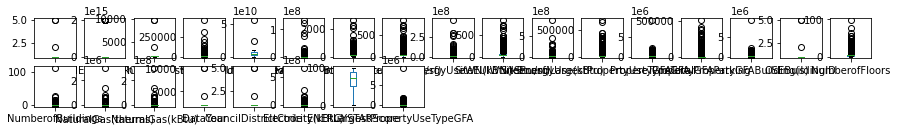

In [20]:
df.plot(kind="box" , subplots=True , layout=(17,17) , figsize=(15,15))

In [21]:
df

,ZipCode,YearsENERGYSTARCertified,YearBuilt,TotalGHGEmissions,ThirdLargestPropertyUseTypeGFA,TaxParcelIdentificationNumber,SteamUse(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),...,NumberofBuildings,NaturalGas(therms),NaturalGas(kBtu),DataYear,CouncilDistrictCode,Electricity(kBtu),Electricity(kWh),ENERGYSTARScore,GHGEmissionsIntensity,LargestPropertyUseTypeGFA
0,5.0,NaN,9775,NaN,NaN,2.312455e+10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10080,5,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,1992,NaN,NaN,7.625703e+09,NaN,NaN,NaN,19.200001,...,NaN,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,1963,NaN,NaN,5.226300e+09,NaN,NaN,NaN,27.100000,...,NaN,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,2015,NaN,NaN,3.303700e+09,NaN,NaN,NaN,30.100000,...,1.0,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,1969,NaN,NaN,9.272201e+09,NaN,NaN,NaN,34.500000,...,NaN,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,1.0,NaN,2010,99.39,NaN,3.834001e+09,0.0000,81.69999695,80.699997,33.799999,...,1.0,15169.839840,1516984.0,2016,1,2700639.0,791512,100.0,0.6,124773.0
3363,1.0,NaN,1924,99.42,NaN,6.003501e+09,0.0000,112.4000015,104.199997,64.300003,...,1.0,17841.310550,1784131.0,2016,1,669202.0,196131.9063,NaN,2.61,34750.0
3364,1.0,NaN,1922,99.44,NaN,6.960001e+08,0.0000,97.5,90.500000,64.500000,...,1.0,18233.908200,1823391.0,2016,1,372437.0,109155,86.0,2.92,34060.0
3365,1.0,NaN,1907,99.59,NaN,5.247801e+09,347207.9063,69.69999695,67.900002,27.000000,...,1.0,9748.979492,974898.0,2016,1,3014081.0,883376.6875,98.0,0.62,160580.0


In [22]:
categ = ["GHGEmissionsIntensity","TotalGHGEmissions" , "NaturalGas(kBtu)", "NaturalGas(therms)", "Electricity(kBtu)", "NaturalGas(therms)", "Electricity(kWh)", "SteamUse(kBtu)", "SiteEnergyUseWN(kBtu)", "SiteEnergyUse(kBtu)" , "SourceEUIWN(kBtu/sf)","SourceEUI(kBtu/sf)","SiteEUIWN(kBtu/sf)","SiteEUI(kBtu/sf)","ENERGYSTARScore","LargestPropertyUseTypeGFA","ThirdLargestPropertyUseTypeGFA","YearsENERGYSTARCertified","OSEBuildingID" , "DataYear" , "ZipCode" , "TaxParcelIdentificationNumber" , "Latitude" , "Longitude" , "YearBuilt" , "NumberofBuildings" , "NumberofFloors" , "PropertyGFATotal" , "PropertyGFAParking" , "PropertyGFABuilding(s)" , "BuildingType" , "PrimaryPropertyType"  , "PropertyName", "Address" , "City"  , "State", "Neighborhood" , "ListOfAllPropertyUseTypes"  , "LargestPropertyUseType", "SecondLargestPropertyUseType" , "ThirdLargestPropertyUseType"  , "SecondLargestPropertyUseTypeGFA", "ComplianceStatus" , "DefaultData"  , "Comments", "ComplianceStatus" , "Outlier" , "NaturalGas(kBtu)" , "Electricity(kBtu)" , "Electricity(kWh)"]

In [23]:
df[categ] = df[categ].apply(le.fit_transform)

KeyError: "['State', 'Longitude', 'Latitude', 'ComplianceStatus', 'LargestPropertyUseType', 'Outlier', 'PrimaryPropertyType', 'PropertyName', 'ListOfAllPropertyUseTypes', 'City', 'BuildingType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'Neighborhood', 'Comments', 'Address', 'DefaultData'] not in index"

In [24]:
df

,ZipCode,YearsENERGYSTARCertified,YearBuilt,TotalGHGEmissions,ThirdLargestPropertyUseTypeGFA,TaxParcelIdentificationNumber,SteamUse(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),...,NumberofBuildings,NaturalGas(therms),NaturalGas(kBtu),DataYear,CouncilDistrictCode,Electricity(kBtu),Electricity(kWh),ENERGYSTARScore,GHGEmissionsIntensity,LargestPropertyUseTypeGFA
0,5.0,NaN,9775,NaN,NaN,2.312455e+10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10080,5,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,1992,NaN,NaN,7.625703e+09,NaN,NaN,NaN,19.200001,...,NaN,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,1963,NaN,NaN,5.226300e+09,NaN,NaN,NaN,27.100000,...,NaN,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,2015,NaN,NaN,3.303700e+09,NaN,NaN,NaN,30.100000,...,1.0,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,1969,NaN,NaN,9.272201e+09,NaN,NaN,NaN,34.500000,...,NaN,NaN,NaN,2016,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,1.0,NaN,2010,99.39,NaN,3.834001e+09,0.0000,81.69999695,80.699997,33.799999,...,1.0,15169.839840,1516984.0,2016,1,2700639.0,791512,100.0,0.6,124773.0
3363,1.0,NaN,1924,99.42,NaN,6.003501e+09,0.0000,112.4000015,104.199997,64.300003,...,1.0,17841.310550,1784131.0,2016,1,669202.0,196131.9063,NaN,2.61,34750.0
3364,1.0,NaN,1922,99.44,NaN,6.960001e+08,0.0000,97.5,90.500000,64.500000,...,1.0,18233.908200,1823391.0,2016,1,372437.0,109155,86.0,2.92,34060.0
3365,1.0,NaN,1907,99.59,NaN,5.247801e+09,347207.9063,69.69999695,67.900002,27.000000,...,1.0,9748.979492,974898.0,2016,1,3014081.0,883376.6875,98.0,0.62,160580.0


In [25]:
df.dropna(inplace=True)

In [26]:
df

,ZipCode,YearsENERGYSTARCertified,YearBuilt,TotalGHGEmissions,ThirdLargestPropertyUseTypeGFA,TaxParcelIdentificationNumber,SteamUse(kBtu),SourceEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),...,NumberofBuildings,NaturalGas(therms),NaturalGas(kBtu),DataYear,CouncilDistrictCode,Electricity(kBtu),Electricity(kWh),ENERGYSTARScore,GHGEmissionsIntensity,LargestPropertyUseTypeGFA
105,1.0,2.010201e+11,1930,100.26,14666.00000,6.590004e+08,0.000000e+00,130.1000061,127.800003,44.500000,...,1.0,10036.219730,1003622.0,2016,1,6736076.0,1974231,91.0,0.49,142034.0
169,1.0,2.017201e+15,1960,1084.79,11888.00000,2.400002e+06,1.276097e+07,206.8999939,202.100006,90.699997,...,1.0,0.000000,0.0,2016,1,14315950.0,4195765,79.0,3.64,286538.0
259,1.0,2.017202e+07,2008,116.95,3534.00000,2.285050e+09,0.000000e+00,207.8000031,207.800003,66.599998,...,1.0,1586.270020,158627.0,2016,1,15566951.0,4562412.5,86.0,0.32,232443.0
340,1.0,2.015201e+07,2008,122.99,4258.00000,6.600012e+08,0.000000e+00,73.80000305,73.800003,25.200001,...,1.0,10650.361330,1065036.0,2016,1,9528945.0,2792774,90.0,0.24,414331.0
543,1.0,2.016201e+11,1988,147.84,38225.00000,1.977200e+09,0.000000e+00,174.3999939,167.699997,56.700001,...,1.0,11706.508790,1170651.0,2016,1,12288296.0,3601493.5,88.0,0.42,193393.0
613,1.0,2.015201e+07,2012,159.8,15417.00000,8.029850e+09,0.000000e+00,91,90.300003,40.299999,...,1.0,25621.150390,2562115.0,2016,1,3403056.0,997378.625,93.0,0.81,130697.0
653,1.0,2.016000e+03,2013,161.23,4850.00000,6.560002e+08,0.000000e+00,155.3999939,149.800003,65.900002,...,1.0,25602.740230,2560274.0,2016,1,3622076.0,1061569.75,27.0,3,89000.0
723,1.0,2.016202e+07,1986,171.52,10290.00000,9.390005e+08,0.000000e+00,160.6999969,160.699997,51.200001,...,1.0,0.000000,0.0,2016,1,24603417.0,7210849,84.0,0.29,470416.0
789,1.0,2.016202e+11,1916,18.87,0.00000,7.821200e+09,0.000000e+00,143.8999939,142.100006,48.400002,...,1.0,1613.089966,161309.0,2016,1,1477827.0,433126.3125,85.0,0.59,19896.0
973,1.0,2.010000e+03,1984,208.79,21782.00000,6.980000e+08,0.000000e+00,506.1000061,506.100006,161.199997,...,1.0,0.000000,0.0,2016,1,29949243.0,8777621,3.0,0.82,158681.0


In [27]:
df.to_csv("testing.csv")

In [ ]:
numericColumns = ['OSEBuildingID', 'CouncilDistrictCode',  'NumberofFloors','PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'BuildingAge']
qualitativesColumns = list(df.select_dtypes(include=['object']))

In [ ]:
df.info()